In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# Define the path to your data
data_path = 'data/'

# Get a list of all CSV files in the directory
csv_files = glob.glob(data_path + "*.csv")

# Function to load data and add labels
def load_data(files):
    data_list = []
    for file in files:
        df = pd.read_csv(file)
        label = file.split('/')[-1].split('.')[0]  # Extract label from filename
        df['label'] = label
        data_list.append(df)
    return pd.concat(data_list, ignore_index=True)

# Load the data
data = load_data(csv_files)

# Drop all z_ columns
z_columns = [col for col in data.columns if col.startswith('z_')]
data.drop(columns=z_columns, inplace=True)

# Display the first few rows of the data
data.head()

,x_0,y_0,visibility_0,x_1,y_1,visibility_1,x_2,y_2,visibility_2,x_3,...,x_30,y_30,visibility_30,x_31,y_31,visibility_31,x_32,y_32,visibility_32,label
0,0.5302,0.1990,1.0000,0.5337,0.1856,0.9999,0.5358,0.1860,0.9999,0.5378,...,0.5127,0.3089,0.7829,0.5116,0.8607,0.9395,0.5246,0.2416,0.9139,kick
1,0.5316,0.2037,1.0000,0.5355,0.1909,0.9999,0.5376,0.1918,0.9999,0.5399,...,0.5062,0.3548,0.7475,0.5119,0.8568,0.9068,0.5108,0.3095,0.8793,kick
2,0.5307,0.2188,0.9999,0.5320,0.2069,0.9999,0.5335,0.2071,0.9999,0.5350,...,0.5200,0.4699,0.6970,0.5063,0.8278,0.9348,0.5249,0.4723,0.8793,kick
3,0.5236,0.2507,0.9999,0.5294,0.2353,0.9999,0.5324,0.2344,0.9998,0.5344,...,0.5198,0.3468,0.6583,0.5066,0.8277,0.9170,0.5374,0.3074,0.8451,kick
4,0.5278,0.2494,0.9999,0.5305,0.2322,0.9999,0.5326,0.2312,0.9998,0.5344,...,0.5276,0.4395,0.6266,0.5067,0.8263,0.9115,0.5351,0.4383,0.8158,kick


In [4]:
data.describe()

,x_0,y_0,visibility_0,x_1,y_1,visibility_1,x_2,y_2,visibility_2,x_3,...,visibility_29,x_30,y_30,visibility_30,x_31,y_31,visibility_31,x_32,y_32,visibility_32
count,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,...,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000
mean,0.485952,0.243184,0.999493,0.488756,0.230904,0.999318,0.490668,0.230676,0.999244,0.492562,...,0.815019,0.465402,0.775297,0.807229,0.487388,0.802012,0.918592,0.453844,0.795075,0.914745
std,0.028977,0.071757,0.002037,0.028443,0.074308,0.002155,0.028305,0.074251,0.002322,0.028188,...,0.094027,0.030199,0.085296,0.080566,0.030484,0.092411,0.084593,0.030909,0.091891,0.073074
min,0.345200,-0.310600,0.941200,0.326800,-0.333600,0.945000,0.318300,-0.332500,0.943400,0.310400,...,0.350500,0.223500,0.111300,0.290000,0.197500,0.033400,0.390400,0.195200,0.052400,0.409200
25%,0.467900,0.191000,0.999800,0.471000,0.176200,0.999600,0.473200,0.175900,0.999600,0.475300,...,0.767000,0.446000,0.720800,0.763400,0.473100,0.736800,0.894300,0.433400,0.736200,0.891000
50%,0.487200,0.252100,0.999900,0.489900,0.240600,0.999900,0.491900,0.240200,0.999900,0.493700,...,0.833100,0.461900,0.773100,0.818600,0.488200,0.795100,0.953700,0.457000,0.789200,0.939300
75%,0.504300,0.299900,1.000000,0.507000,0.290100,0.999900,0.508600,0.289700,0.999900,0.510600,...,0.883200,0.488200,0.834100,0.861800,0.506400,0.867100,0.972800,0.474200,0.852100,0.963800
max,0.647000,0.419400,1.000000,0.652300,0.417300,1.000000,0.657500,0.419800,1.000000,0.662600,...,0.990100,0.595100,1.431800,0.985500,0.698000,1.477700,0.992100,0.580900,1.472400,0.991000


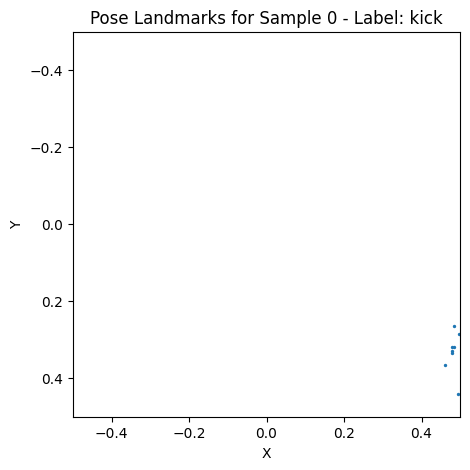

In [5]:
# Function to plot pose landmarks
def plot_pose(df, idx):
    x_columns = [col for col in df.columns if col.startswith('x_')]
    y_columns = [col for col in df.columns if col.startswith('y_')]

    x = df.iloc[idx][x_columns].values
    y = df.iloc[idx][y_columns].values

    plt.figure(figsize=(5, 5))
    plt.scatter(x, y, s=2)
    plt.xlabel('X')
    plt.xlim(-0.5, 0.5)  # Set x-axis range from 0 to 1
    plt.ylabel('Y')
    plt.ylim(-0.5, 0.5)  # Set y-axis range from 0 to 1
    plt.gca().invert_yaxis()
    plt.title(f'Pose Landmarks for Sample {idx} - Label: {df.iloc[idx]["label"]}')
    plt.show()

# Plot the original data
plot_pose(data, 0)

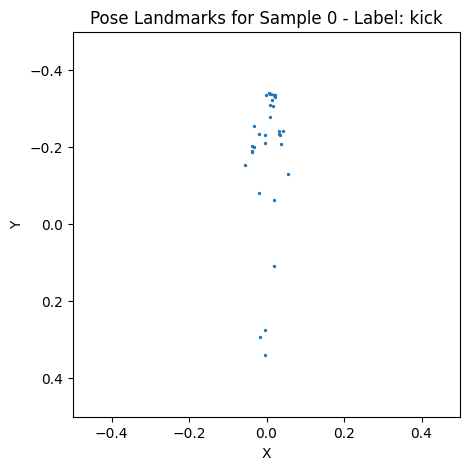

In [6]:
# Optimized function to normalize the pose data so that the lowest x and y values are 0
def center_data(df):
    # Identify the columns for x and y coordinates
    x_columns = [col for col in df.columns if col.startswith('x_')]
    y_columns = [col for col in df.columns if col.startswith('y_')]

    # Extract the values as NumPy arrays for fast operations
    x_values = df[x_columns].values
    y_values = df[y_columns].values

    # Find the max and min x and y values across all landmarks
    min_x = np.min(x_values, axis=1, keepdims=True)
    min_y = np.min(y_values, axis=1, keepdims=True)
    max_x = np.max(x_values, axis=1, keepdims=True)
    max_y = np.max(y_values, axis=1, keepdims=True)

    center_x = (max_x + min_x) / 2
    center_y = (max_y + min_y) / 2

    # Subtract the center values to normalize the coordinates
    x_values -= center_x
    y_values -= center_y

    # Update the DataFrame with the normalized values
    df[x_columns] = x_values
    df[y_columns] = y_values

    return df


data_centered = center_data(data.copy())

# Plot the normalized data
plot_pose(data_centered, 0)


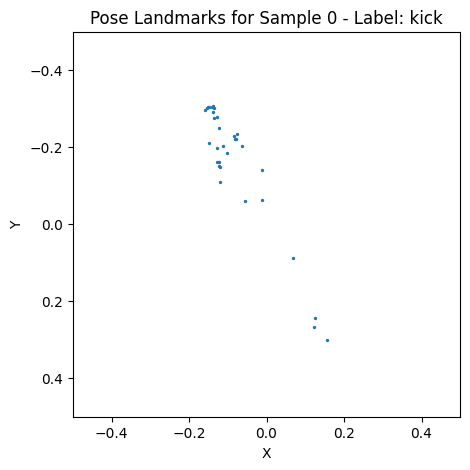

In [7]:
# Function to apply random rotation to the pose data
def random_rotation(df, max_angle=30):
    angle = np.random.uniform(-max_angle, max_angle)
    radians = math.radians(angle)

    cos_angle = np.cos(radians)
    sin_angle = np.sin(radians)

    x_columns = [col for col in df.columns if col.startswith('x_')]
    y_columns = [col for col in df.columns if col.startswith('y_')]

    for i in range(len(x_columns)):
        x = df[x_columns[i]].values
        y = df[y_columns[i]].values

        x_new = x * cos_angle - y * sin_angle
        y_new = x * sin_angle + y * cos_angle

        df[x_columns[i]] = x_new
        df[y_columns[i]] = y_new

    return df

# Apply random rotation
data_rotated = random_rotation(data_centered.copy())

# Plot the original data
plot_pose(data_rotated, 0)

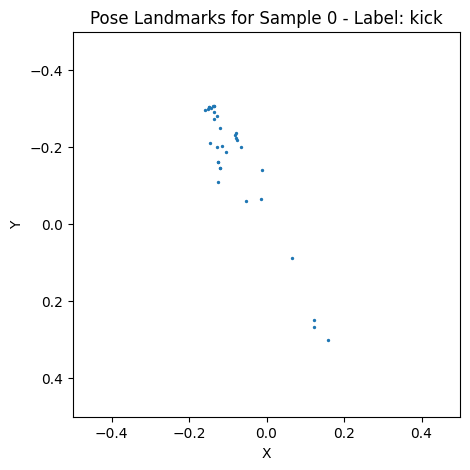

In [8]:
# Function to add noise to the pose data
def add_noise(df, noise_level=0.002):
    noise = np.random.normal(0, noise_level, df.iloc[:, :-1].shape)
    df.iloc[:, :-1] += noise
    return df

# Apply random rotation
data_processed = add_noise(data_rotated.copy())

# Plot the original data
plot_pose(data_processed, 0)

In [9]:
# Process data
def process_data(df):
    df = center_data(df.copy())
    
    df_rotated1 = random_rotation(df.copy())
    df_rotated2 = random_rotation(df.copy())
    
    df_combined = pd.concat([df, df_rotated1, df_rotated2], ignore_index=True)
    df_noisy = add_noise(df_combined.copy())
    return df_noisy

# Process original and augmented data
data_processed = process_data(data)
data_processed.describe()

,x_0,y_0,visibility_0,x_1,y_1,visibility_1,x_2,y_2,visibility_2,x_3,...,visibility_29,x_30,y_30,visibility_30,x_31,y_31,visibility_31,x_32,y_32,visibility_32
count,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,...,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000
mean,0.038066,-0.263553,0.999503,0.042262,-0.274928,0.999307,0.044114,-0.274919,0.999249,0.045939,...,0.814991,-0.047472,0.242374,0.807224,-0.029812,0.270641,0.918603,-0.061005,0.259857,0.914759
std,0.076323,0.073023,0.002834,0.079361,0.075721,0.002929,0.079314,0.075763,0.003050,0.079292,...,0.094045,0.073465,0.083181,0.080588,0.080678,0.088619,0.084616,0.078457,0.089319,0.073113
min,-0.119780,-0.869439,0.939187,-0.119909,-0.900792,0.942936,-0.115682,-0.902781,0.940381,-0.116798,...,0.347465,-0.478729,-0.370271,0.286572,-0.545727,-0.441125,0.388789,-0.502892,-0.433620,0.406711
25%,-0.019572,-0.313235,0.998230,-0.018176,-0.326769,0.998059,-0.016084,-0.326623,0.998012,-0.014468,...,0.766821,-0.110301,0.192946,0.763497,-0.102031,0.211375,0.894353,-0.124172,0.205584,0.891014
50%,0.004003,-0.253608,0.999704,0.006723,-0.264500,0.999545,0.008838,-0.264565,0.999523,0.010840,...,0.832958,-0.019129,0.240315,0.818736,0.004504,0.265669,0.953608,-0.028443,0.254718,0.939166
75%,0.108685,-0.205532,1.001086,0.115196,-0.214762,1.000967,0.116439,-0.214745,1.000959,0.117563,...,0.883152,0.005779,0.294938,0.861850,0.029566,0.329648,0.972882,-0.002575,0.315655,0.964031
max,0.445540,-0.065500,1.007133,0.443949,-0.064152,1.009018,0.435765,-0.059768,1.007201,0.429178,...,0.993144,0.162811,0.876821,0.986977,0.235861,0.904635,0.996102,0.207959,0.902423,0.994969


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode labels
label_encoder = LabelEncoder()
data_processed['label_encoded'] = label_encoder.fit_transform(data_processed['label'])

# Prepare features and labels
X = data_processed.drop(columns=['label', 'label_encoded'])
y = data_processed['label_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f'Training features shape: {X_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Testing labels shape: {y_test.shape}')

Training features shape: (21160, 99)
Training labels shape: (21160,)
Testing features shape: (5291, 99)
Testing labels shape: (5291,)


Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

       block       0.88      0.86      0.87       343
        idle       0.97      0.97      0.97      4504
        kick       0.73      0.67      0.70       152
       punch       0.75      0.77      0.76       292

    accuracy                           0.94      5291
   macro avg       0.83      0.82      0.82      5291
weighted avg       0.94      0.94      0.94      5291



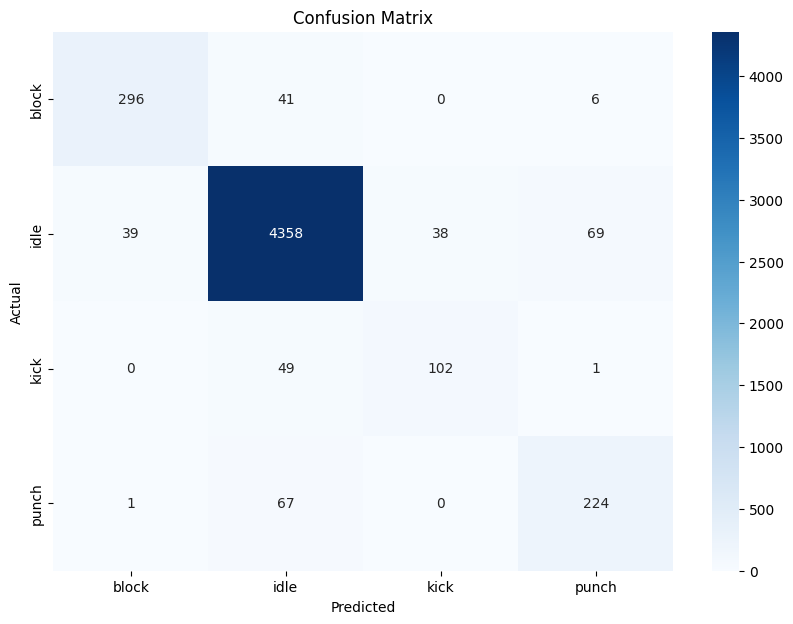

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create an instance of the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Measure the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.96
              precision    recall  f1-score   support

       block       0.90      0.98      0.94       343
        idle       0.98      0.98      0.98      4504
        kick       0.86      0.72      0.79       152
       punch       0.86      0.83      0.84       292

    accuracy                           0.96      5291
   macro avg       0.90      0.88      0.89      5291
weighted avg       0.96      0.96      0.96      5291



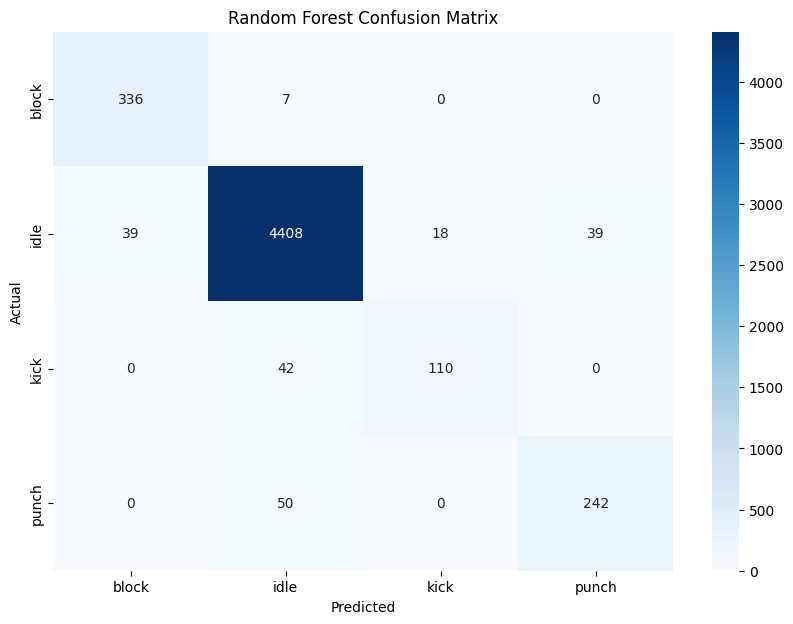

XGBoost Accuracy: 0.97
              precision    recall  f1-score   support

       block       0.94      0.97      0.95       343
        idle       0.98      0.98      0.98      4504
        kick       0.85      0.84      0.85       152
       punch       0.87      0.87      0.87       292

    accuracy                           0.97      5291
   macro avg       0.91      0.92      0.91      5291
weighted avg       0.97      0.97      0.97      5291



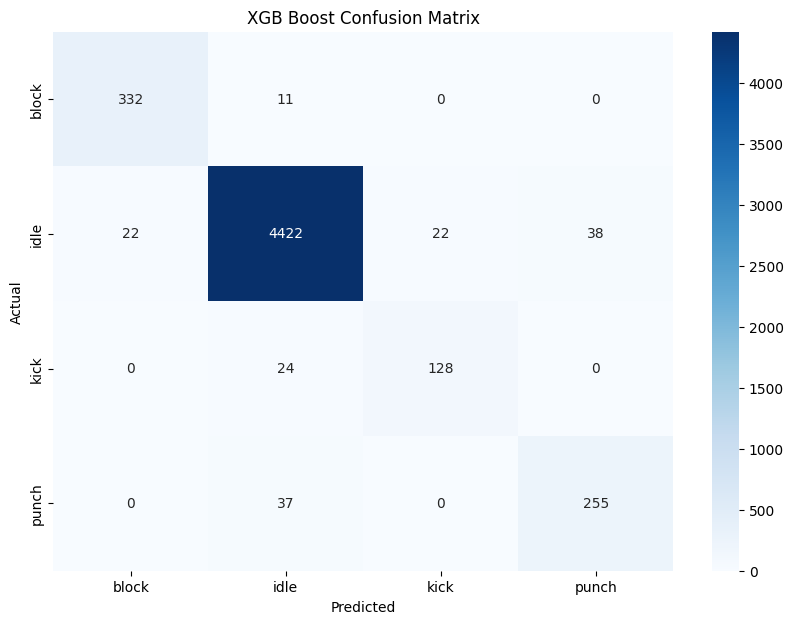

In [13]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.2f}')
print(classification_report(y_test, rf_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# XGBoost
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, xgb_pred):.2f}')
print(classification_report(y_test, xgb_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGB Boost Confusion Matrix')
plt.show()

In [ ]:
import time

xgb_clf.fit(X_train, y_train)

# Measure prediction time for XGBoost
start_time = time.time()
for _ in range(100):
    xgb_clf.predict(X_test[:1])
end_time = time.time()
xgb_prediction_time = (end_time - start_time) / 100
print(f'XGBoost average prediction time: {xgb_prediction_time * 1000:.2f} ms')

XGBoost average prediction time: 8.58 ms


In [ ]:
xgb_clf.save_model('xgb_model_v2.json')

In [16]:
data_centered['label_encoded'] = label_encoder.fit_transform(data_centered['label'])
X_test_orignial = data_centered.drop(columns=['label', 'label_encoded'])
y_test_original = data_centered['label_encoded']

/var/folders/n3/m4771czd11lb52bqkc38pb740000gn/T/ipykernel_13763/905123999.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_centered['label_encoded'] = label_encoder.fit_transform(data_centered['label'])


In [17]:
xgb_pred_original = xgb_clf.predict(X_test_orignial)
print(f'XGBoost Accuracy: {accuracy_score(y_test_original, xgb_pred_original):.2f}')
print(classification_report(y_test_original, xgb_pred_original, target_names=label_encoder.classes_))

XGBoost Accuracy: 0.99
              precision    recall  f1-score   support

       block       0.97      1.00      0.98       566
        idle       1.00      0.99      0.99      7507
        kick       0.96      0.96      0.96       257
       punch       0.95      0.98      0.96       487

    accuracy                           0.99      8817
   macro avg       0.97      0.98      0.98      8817
weighted avg       0.99      0.99      0.99      8817

